ANÁLISIS EXPLORATORIO DE DATOS CON PYTHON


The dataset you're given (data.csv) contains information about vehicle colision reports in the Monterrey Metropolitan area.
Analyze the data and answer the following questions based on it.
Please be sure to reply back to us with your answers and attach the source code you used to answer them (it can be a Jupyter notebook, an Rmd script, an R script, a Python script, an Excel spreadsheet, etc.)


## Questions


1. Which roads "appear to be" the top 10 most dangerous roads of Monterrey Metropolitan area?
2. What's the age group with the overall highest number of reported colisions? You can consider any age groupings for the purposes of this question. Explain this in a graphical way.
3. If you were to see a collision in the "Garza Sada" road, What would be the odds for that person to have any type of positive alcohol ingestion opinion?
4. Why do you think we use the phrase "appear to be" in question 1? What would you need to be able to speak with more confidence about the answer to that question?
5. What modelling project would you push to develop from the conclusions in this dataset?


In [ ]:
1.Comprender el problema
2.Estudio univariable
3.Estudio multivariable
4.Limpieza básica de los datos
5.Comprobación de suposiciones

In [1]:
# Importo las librerías básicas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [4]:
# Asigno los datos a un dataframe:

df_data = pd.read_csv('data.csv')
df_data.head(10)

,Column,Calle,Causa,Ciudad,Cruce,Fecha,Hora,ID,Latitud,Lesionados,...,V2_Uso de Cinturón,V3_Arresto,V3_Dictamen,V3_Edad,V3_Estatus Licencia,V3_Género,V3_No. De Fallecidos,V3_No. De Lesionados,V3_Tipo de Vehículo,V3_Uso de Cinturón
0,0,CAMINO REAL,NO RESPETAR SEÑALAMIENTOS,Monterrey,SANTOS PALOMO,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY1,25.77443,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BERNARDO REYES,Otros,Monterrey,FIDEL VELAZQUEZ,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY10,25.724161,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BERNARDO REYES,Otros,Monterrey,REFORMA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY11,25.685874,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,LINCOLN,INVADIR CARRIL,Monterrey,CUMBRES DEL SOL,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY12,25.797401,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,MADERO,NO GUARDAR DISTANCIA,Monterrey,PABLO A DE LA GARZA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY13,25.682219,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,REVOLUCION,No Respetó Semáforo,Monterrey,PROLONG. ALFONSO REYES,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY14,25.643311,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,ANT CAM A VILLA DE SANTIAGO,NO GUARDAR DISTANCIA,Monterrey,CORREOS MEXICANOS,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY15,25.584966,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,CHURUBUSCO,NO GUARDAR DISTANCIA,Monterrey,FRANCISCO BELTRAN,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY16,25.691499,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,LAS FLORES,INVADIR CARRIL,Monterrey,RANGEL FRIAS,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY17,25.730572,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,COLOSIO,Otros,Monterrey,AVE DEL PALMAR,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY18,25.795179,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automóvil,NaN


In [5]:
# Echo un vistazo las columnas:

df_data.columns

Index(['Column', 'Calle', 'Causa', 'Ciudad', 'Cruce', 'Fecha', 'Hora', 'ID',
       'Latitud', 'Lesionados', 'Longitud', 'Mes', 'Muertos',
       'No. De Infracción', 'Número  total de lesionados',
       'Número total de muertos', 'Por alcohol', 'Sentido',
       'Situación climática', 'Situación del Pavimento', 'Tipo de incidente',
       'Tipo de involucrado', 'Tipo de vía', 'V1_Arresto', 'V1_Dictamen',
       'V1_Edad', 'V1_Estatus Licencia', 'V1_Género', 'V1_No. De Fallecidos',
       'V1_No. De Lesionados', 'V1_Tipo de Vehículo', 'V1_Uso de Cinturón',
       'V2_Arresto', 'V2_Dictamen', 'V2_Edad', 'V2_Estatus Licencia',
       'V2_Género', 'V2_No. De Fallecidos', 'V2_No. De Lesionados',
       'V2_Tipo de Vehículo', 'V2_Uso de Cinturón', 'V3_Arresto',
       'V3_Dictamen', 'V3_Edad', 'V3_Estatus Licencia', 'V3_Género',
       'V3_No. De Fallecidos', 'V3_No. De Lesionados', 'V3_Tipo de Vehículo',
       'V3_Uso de Cinturón'],
      dtype='object')

In [9]:
pd.unique(df_data['Lesionados'])


array(['No', 'Sí', nan, '0', 'SD', '2', '1', '4', '5', '3'], dtype=object)

In [10]:
pd.unique(df_data['Ciudad'])


array(['Monterrey', 'San Nicolás', 'Guadalupe', 'Apodaca', 'Escobedo',
       'Santa Catarina', 'San Pedro', 'García', nan, ' '], dtype=object)

Which roads "appear to be" the top 10 most dangerous roads of Monterrey Metropolitan area?

Analizando que calles aparecen mas veces relacionandolo con el numero de incidentes que ocurren


In [12]:
df_data['Calle'].value_counts()

MORONES PRIETO                  1729
LAZARO CARDENAS                 1279
GONZALITOS                      1229
GARZA SADA                      1215
ALFONSO REYES                   1153
                                ... 
AV CARRETERA A SALTILLO            1
CERRO DE LA ESPERANZA              1
ANTIGUO CAMINO A LA HUASTECA       1
CAMINO DE LA MONTAÑA               1
Olmo                               1
Name: Calle, Length: 5614, dtype: int64

In [14]:
Top_ten_calles=df_data['Calle'].value_counts()
Top_ten_calles.head(10)


MORONES PRIETO      1729
LAZARO CARDENAS     1279
GONZALITOS          1229
GARZA SADA          1215
ALFONSO REYES       1153
JOSE VASCONCELOS     964
LEONES               891
AV. LINCOLN          838
CONSTITUCION         823
LINCOLN              752
Name: Calle, dtype: int64

In [15]:
Top_ten_muertes=df_data['Muertos'].value_counts()
Top_ten_muertes.head(10)

No           19943
0             2020
Sí             362
SD              43
1                6
HUYO             3
SE RETIRO        2
Name: Muertos, dtype: int64

In [16]:
# Resumen de estadística descriptiva:

df_data['Calle'].describe()

count              54998
unique              5614
top       MORONES PRIETO
freq                1729
Name: Calle, dtype: object

In [17]:
df_data['Lesionados'].describe()

count     27935
unique        9
top          No
freq      24059
Name: Lesionados, dtype: object

In [29]:
Top_ten_lesionados=df_data['Lesionados'].value_counts()
Top_ten_lesionados.head(10)

No    24059
0      1985
SD      946
Sí      865
1        62
2        10
3         6
4         1
5         1
Name: Lesionados, dtype: int64

In [33]:
Top_ten_muertos=df_data['Muertos'].value_counts()
Top_ten_muertos.head(10)

No           19943
0             2020
Sí             362
SD              43
1                6
HUYO             3
SE RETIRO        2
Name: Muertos, dtype: int64

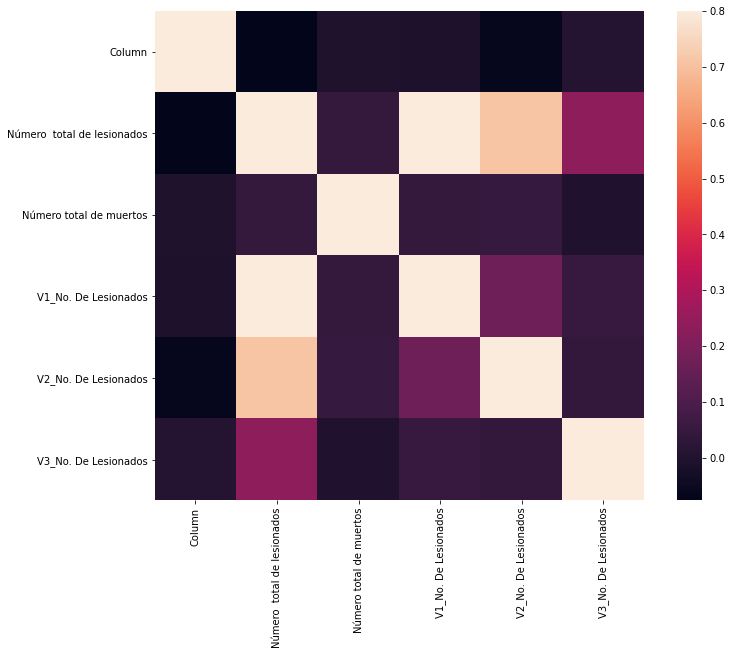

In [32]:
# Matriz de correlación:

corrmat = df_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


In [ ]:
def fibo_recursivo(n):
    if n <= 1:
        return n #Caso base
    else:
        return fibo_recursivo(n - 1) + fibo_recursivo(n - 2)
#LLamadas recursivas
[fibo_recursivo(x) for x in range(10)]

[0,1,2,3,5,8,13,21,34]

fibo_recursivo(20)

fibo_recursivo(2345)


    

In [ ]:
fibo_recursivo(2345)

In [ ]:
fibo_recursivo(20)

In [ ]:
[fibo_recursivo(x) for x in range(10)]